In [45]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
zip_path = '/content/drive/MyDrive/BN.zip'

In [47]:
import zipfile

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/destination_folder1')

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

In [49]:
from keras.preprocessing.image import ImageDataGenerator
data_gen=ImageDataGenerator(rescale=1./255,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True)

In [50]:
data_path="destination_folder1"

train_gen=data_gen.flow_from_directory(data_path + '/train1',
                                             target_size=(224,224),
                                             batch_size=64,
                                             class_mode='categorical')
val_datagen = ImageDataGenerator(rescale = 1./255)
val_gen=val_datagen.flow_from_directory(data_path + '/valid1',
                                             target_size=(224,224),
                                             batch_size=1,
                                             class_mode='categorical',
                                             shuffle=False)

Found 5756 images belonging to 2 classes.
Found 1241 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications.resnet_v2 import ResNet101V2, preprocess_input

model = Sequential([ResNet101V2(include_top=False,
                             weights='imagenet',
                             pooling='avg'),
                    Dense(2, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax')])
model.layers[0].trainable = False

171317808/171317808 [==============================] - 1s 0us/step


In [ ]:
opt=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)


In [ ]:
model.compile(optimizer = opt,
              loss='squared_hinge',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 2048)              42626560  
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 42630658 (162.62 MB)
Trainable params: 4098 (16.01 KB)
Non-trainable params: 42626560 (162.61 MB)
_________________________________________________________________


In [ ]:
history = model.fit(x=train_gen, validation_data=val_gen, epochs=12)

Epoch 1/12
90/90 [==============================] - 122s 1s/step - loss: 0.8484 - accuracy: 0.8384 - val_loss: 0.6906 - val_accuracy: 0.9275
Epoch 2/12
90/90 [==============================] - 106s 1s/step - loss: 0.6699 - accuracy: 0.9401 - val_loss: 0.6688 - val_accuracy: 0.9388
Epoch 3/12
90/90 [==============================] - 106s 1s/step - loss: 0.6513 - accuracy: 0.9475 - val_loss: 0.6615 - val_accuracy: 0.9396
Epoch 4/12
90/90 [==============================] - 105s 1s/step - loss: 0.6440 - accuracy: 0.9529 - val_loss: 0.6579 - val_accuracy: 0.9412
Epoch 5/12
90/90 [==============================] - 106s 1s/step - loss: 0.6364 - accuracy: 0.9550 - val_loss: 0.6551 - val_accuracy: 0.9396
Epoch 6/12
90/90 [==============================] - 106s 1s/step - loss: 0.6345 - accuracy: 0.9552 - val_loss: 0.6554 - val_accuracy: 0.9404
Epoch 7/12
90/90 [==============================] - 106s 1s/step - loss: 0.6300 - accuracy: 0.9576 - val_loss: 0.6475 - val_accuracy: 0.9420
Epoch 8/12
90

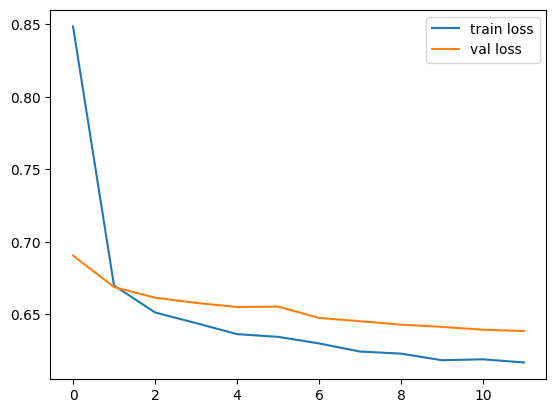

In [ ]:
# plot the losses
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')


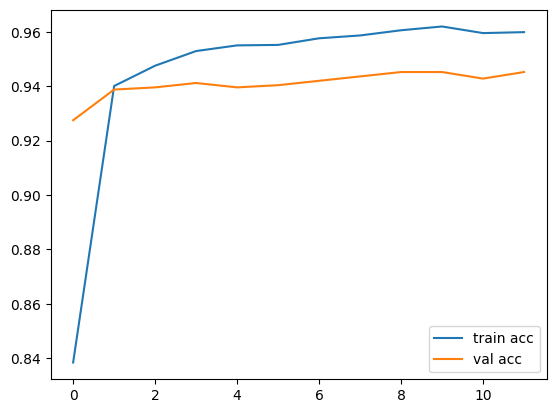

In [ ]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

In [ ]:
path = '/content/drive/MyDrive/resnet101V2.h5'

# Save the model
model.save(path)

print("Model saved at:",path)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at: /content/drive/MyDrive/resnet101V2.h5


In [ ]:
from tensorflow.keras.models import load_model
model=load_model(path)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 2048)              42626560  
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 42630658 (162.62 MB)
Trainable params: 4098 (16.01 KB)
Non-trainable params: 42626560 (162.61 MB)
_________________________________________________________________


In [ ]:
data_path ="destination_folder1"

test_datagen= ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(data_path + '/test1',
                                              target_size=(224,224),
                                              batch_size=1,
                                              class_mode='categorical',
                                              shuffle=False)


Found 1246 images belonging to 2 classes.


In [ ]:
y_pred = model.predict(test_gen)
y_pred = np.argmax(y_pred, axis=1)

1246/1246 [==============================] - 20s 16ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_gen.classes, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       540
           1       0.96      0.97      0.96       706

    accuracy                           0.96      1246
   macro avg       0.96      0.96      0.96      1246
weighted avg       0.96      0.96      0.96      1246



Text(0.5, 1.0, 'Confusion matrix of model')

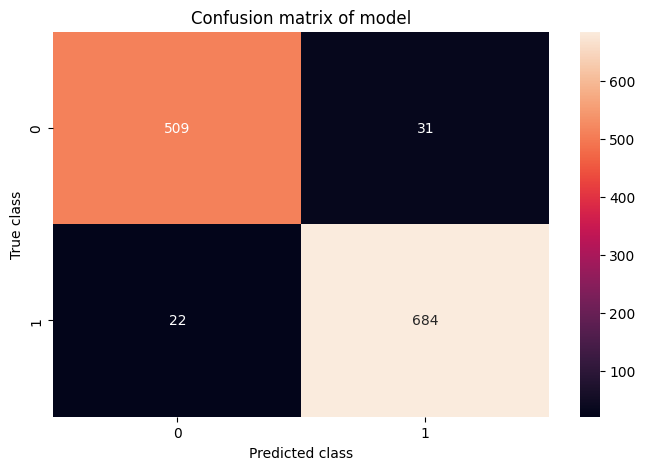

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cf_matrix = confusion_matrix(test_gen.classes, y_pred)
import seaborn as sns
plt.figure(figsize=(8,5))
heatmap = sns.heatmap(cf_matrix, annot=True, fmt='d', color='blue')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix of model')

In [ ]:
accuracy_score(test_gen.classes, y_pred)

0.9574638844301766